In [1]:
import getdata
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#Checking CSV dataframe and structure.
getdata.netflix_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [3]:
# Check to see if there are any duplicate show ID's
getdata.netflix_df[getdata.netflix_df.duplicated(subset="id")]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [4]:
# Create new dataframe for only show types and relevant info

show_type_df = getdata.netflix_df[['title',
 'type',
 'age_certification',
 'runtime',
 'genres',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score']].copy()

# Checking for Null values.  Specifically looking at title or type
show_type_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5849 non-null   object 
 1   type               5850 non-null   object 
 2   age_certification  3231 non-null   object 
 3   runtime            5850 non-null   int64  
 4   genres             5850 non-null   object 
 5   seasons            2106 non-null   float64
 6   imdb_id            5447 non-null   object 
 7   imdb_score         5368 non-null   float64
 8   imdb_votes         5352 non-null   float64
 9   tmdb_popularity    5759 non-null   float64
 10  tmdb_score         5539 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 502.9+ KB


In [5]:
# Show structure of dataframe
show_type_df.head()

,title,type,age_certification,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,TV-MA,51,['documentation'],1.0,NaN,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",NaN,tt0075314,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,R,109,"['drama', 'action', 'thriller', 'european']",NaN,tt0068473,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,PG,91,"['fantasy', 'action', 'comedy']",NaN,tt0071853,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,NaN,150,"['war', 'action']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [6]:
# Remove null row for Title and retest
show_type_df.dropna(subset="title",inplace=True)

show_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5849 non-null   object 
 1   type               5849 non-null   object 
 2   age_certification  3231 non-null   object 
 3   runtime            5849 non-null   int64  
 4   genres             5849 non-null   object 
 5   seasons            2106 non-null   float64
 6   imdb_id            5446 non-null   object 
 7   imdb_score         5368 non-null   float64
 8   imdb_votes         5352 non-null   float64
 9   tmdb_popularity    5759 non-null   float64
 10  tmdb_score         5539 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 548.3+ KB


    type  title
0  MOVIE   3743
1   SHOW   2106


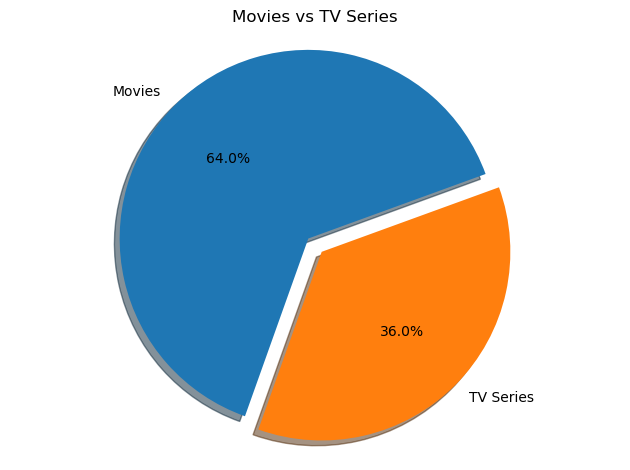

In [7]:
# Pie Chart - movies vs show
movie_show_df = pd.DataFrame(show_type_df.groupby(["type"])["title"].count()).reset_index()
print(movie_show_df.head())

plt.pie(movie_show_df['title'], labels=["Movies", "TV Series"], autopct="%1.1f%%", startangle=20, explode = (0, .1), shadow=True)
plt.axis("equal")
plt.title("Movies vs TV Series")
plt.tight_layout()

plt.show()

In [8]:
# Distribution of ratings by type

movies_ratings_df = show_type_df.loc[show_type_df["type"] == "MOVIE", :]
movie_ratings_df.head()

NameError: name 'movie_ratings_df' is not defined